In [1]:
# Autoreload ensures that your python-files stay up-to-date: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Move back to the app/ directory
%cd /app/

/app


# Dataset

This notebook creates a dataset split for our problem.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from random import choice
from collections import Counter

## Sneak Peak

Have a first sneak peak at the data.

In [3]:
# Load in the dataset
with open(Path.cwd() / "data/data/dataset.json") as f:
    dataset = json.load(f)
len(dataset)

136

In [4]:
# The keys are the images (without the '.png') that are annotated
dataset.keys()

dict_keys(['sw0268', 'sh168', 'sw1078', 'sh824', 'sw0035', 'sw0562', 'sw0904', 'sw0967', 'sw0905', 'sw0956', 'sw0282', 'sw1098', 'sw0598', 'sh498', 'sw0681', 'sw0040', 'sw0895', 'sw0001c', 'sh654', 'sw0092', 'sw0894', 'sp133', 'mk069', 'sw0467b', 'sw0035a', 'sw0125', 'sw0156', 'sw0555', 'sw0001a', 'sw0533', 'sh748', 'sh265', 'col195', 'sh556', 'sw1037', 'dis014', 'sw0232', 'hp155', 'sw0394', 'sh158', 'sw0923', 'colsh11', 'sw0634a', 'sw0172', 'njo617', 'sw1222', 'colsh16', 'sh435', 'colsh10', 'coltlbm38', 'sh305', 'col243', 'sw1160', 'sh112a', 'sw0027', 'sw0105', 'sh415', 'mk054', 'sh334', '85863pb105', 'sh659', 'cty0323', 'colsh14', 'boat009', 'njo579', 'idea018', 'trn227a', 'trn249', 'hp190', 'cty0276', 'sw0263', 'sh822', 'twn292', 'sh161', 'sh548', 'cty0078', 'cty0096', 'sw0801', 'jbr007', 'cty1093', 'sh153', 'trn116', 'hol165', 'sh582', 'hp245', 'post010', 'air037', 'colhp32', 'cty0609', 'sw0975', 'cty0479', 'pi027', 'cty0050', 'cas132a', 'njo149', 'rck010', 'pln146', 'pi135b', 'njo

In [5]:
# The values are the annotations
dataset["sw0268"]

['helmet', 'robot']

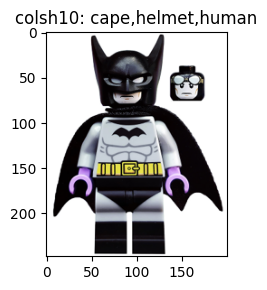

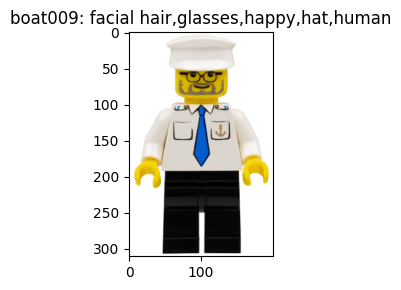

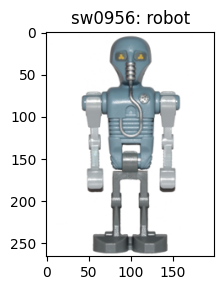

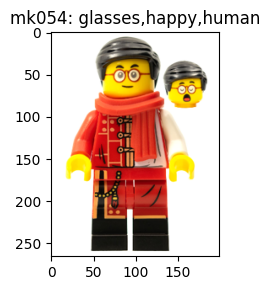

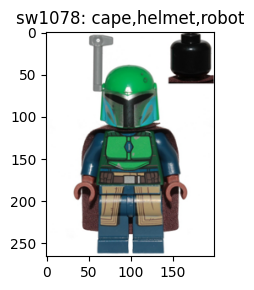

In [6]:
# Show some examples
for _ in range(5):
    k = choice(list(dataset.keys()))
    plt.figure(figsize=(3, 3))
    plt.imshow(plt.imread(Path.cwd() / "data/data/minifigures" / f"{k}.png"))
    plt.title(f"{k}: {','.join(dataset[k])}")
    plt.tight_layout()
    plt.show()

## Distributions

Have a look at the data distributions.

In [7]:
# Check the distribution for the labels
counter = Counter(x for y in dataset.values() for x in y)
counter.most_common(3)

[('human', 76), ('happy', 47), ('helmet', 40)]

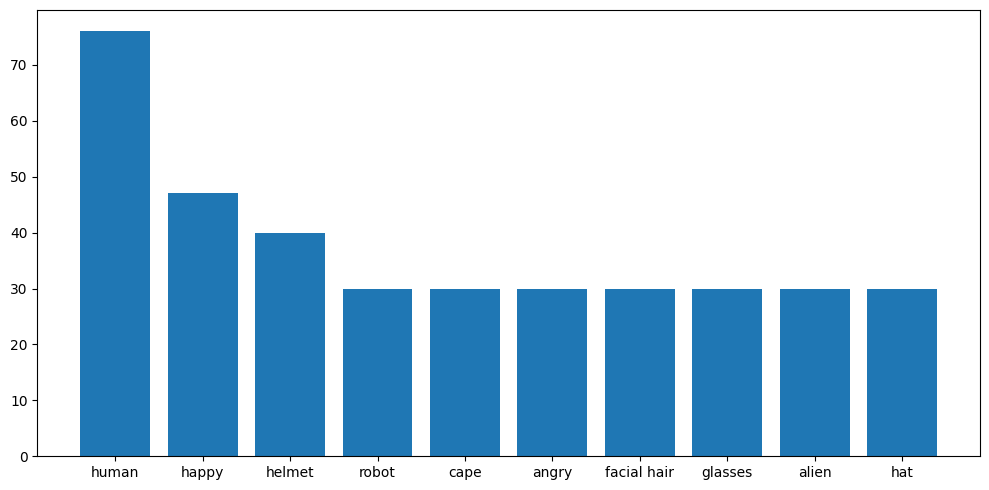

In [8]:
# Show most common in a graph
plt.figure(figsize=(10, 5))
x, y = zip(*counter.most_common(len(counter)))
plt.bar(x, y)
plt.tight_layout()
plt.show()

In [9]:
# Check the distribution for the amount of labels per image
counter = Counter(len(y) for y in dataset.values())
counter.most_common(3)

[(3, 44), (4, 34), (1, 29)]

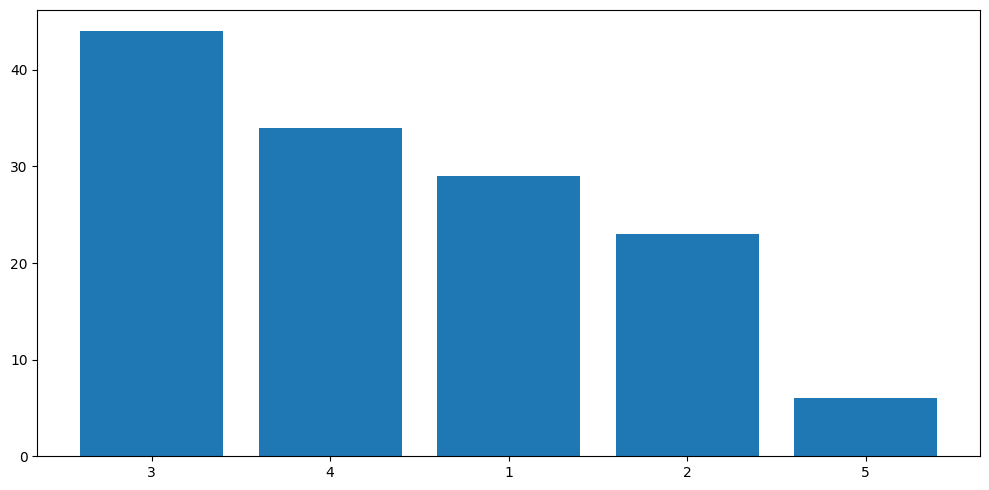

In [10]:
# Show most common in a graph
plt.figure(figsize=(10, 5))
x, y = zip(*counter.most_common(len(counter)))
plt.bar([str(i) for i in x], y)  # If not str, then bar auto-sorts on x-values
plt.tight_layout()
plt.show()

## Dataset creation

Create training, validation, and testing splits for the dataset.

**Question: Why do we split in training, validation, and test splits? Where are each of these datasets used for?**

**Note: We need to install `scikit-multilearn` first!**

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import iterative_train_test_split

In [12]:
# List the labels and put them in a multi-hot format
keys, labels = zip(*dataset.items())
one_hot = MultiLabelBinarizer()
labels_ = one_hot.fit_transform(labels)
one_hot.classes_, labels_.shape

(array(['alien', 'angry', 'cape', 'facial hair', 'glasses', 'happy', 'hat',
        'helmet', 'human', 'robot'], dtype=object),
 (136, 10))

In [13]:
# Split the dataset into train*, and validation splits
idx = np.arange(len(keys))[:, None]
idx, labels_, test_idx, test_labels = iterative_train_test_split(idx, labels_, test_size=5 / 30)
print(f"Number of samples in the test-set: {len(test_idx)}")
for cls, count in zip(one_hot.classes_, test_labels.sum(axis=0)):
    print(f" - {cls}: {count}")

Number of samples in the test-set: 23
 - alien: 5
 - angry: 5
 - cape: 5
 - facial hair: 5
 - glasses: 6
 - happy: 8
 - hat: 5
 - helmet: 7
 - human: 13
 - robot: 5


In [14]:
test_keys = [keys[i] for i in test_idx[:, 0]]
test_keys

['sh168',
 'sh824',
 'sw0967',
 'sw0956',
 'sw0681',
 'sh748',
 'sh265',
 'sh556',
 'sw0394',
 'colsh11',
 'cty0323',
 'boat009',
 'twn292',
 'sh161',
 'sh582',
 'air037',
 'pi027',
 'cty0478',
 'cas500',
 'sw0392',
 'njo158',
 'sw0005a',
 'sh152']

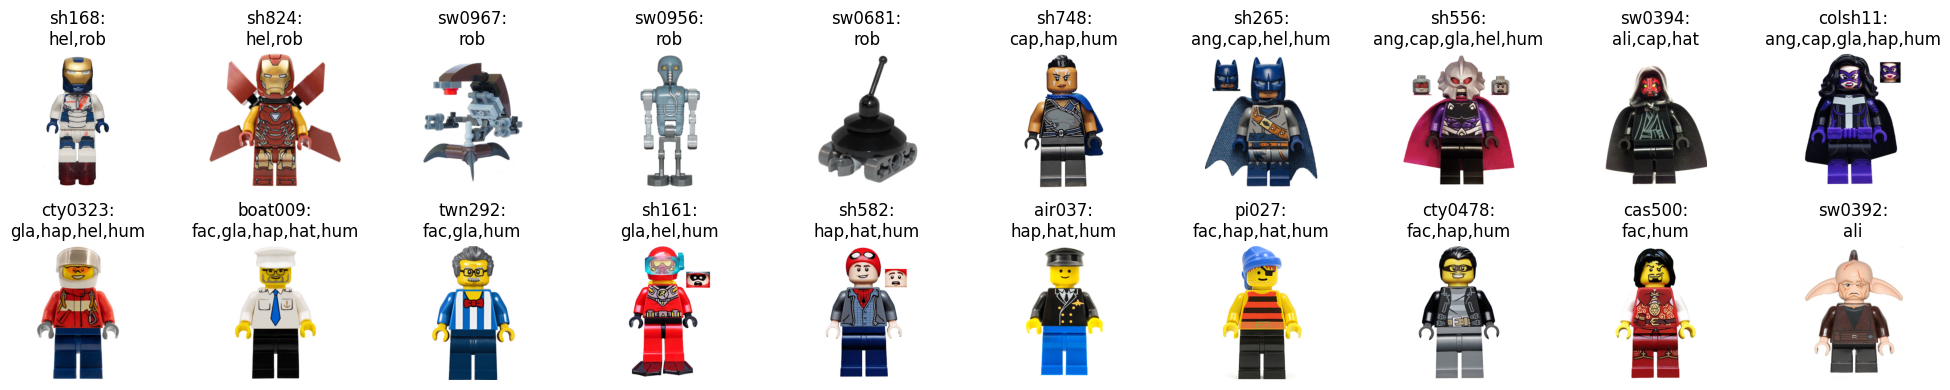

In [15]:
_, axs = plt.subplots(2, 10, figsize=(20, 4))
for i, k in enumerate(test_keys[:20]):
    ax = axs[i // 10, i % 10]
    ax.imshow(plt.imread(Path.cwd() / "data/data/minifigures" / f"{k}.png"))
    ax.set_title(f"{k}:\n{','.join([x[:3] for x in dataset[k]])}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [16]:
# Split for the validation split
train_idx, train_labels, val_idx, val_labels = iterative_train_test_split(
    idx, labels_, test_size=5 / 25
)
print(f"Number of samples in the validation-set: {len(val_idx)}")
for cls, count in zip(one_hot.classes_, val_labels.sum(axis=0)):
    print(f" - {cls}: {count}")

Number of samples in the validation-set: 24
 - alien: 5
 - angry: 7
 - cape: 6
 - facial hair: 5
 - glasses: 6
 - happy: 8
 - hat: 5
 - helmet: 7
 - human: 14
 - robot: 5


In [17]:
val_keys = [keys[i] for i in val_idx[:, 0]]
train_keys = [keys[i] for i in train_idx[:, 0]]
val_keys

['sw1078',
 'sw0562',
 'sw0904',
 'sw0895',
 'sw0001c',
 'sw0923',
 'njo617',
 'sw1222',
 'coltlbm38',
 'mk054',
 'sh659',
 'njo579',
 'cty0078',
 'cty0096',
 'jbr007',
 'post010',
 'cty0609',
 'sh545',
 'hp302',
 'sh257',
 'sw0810',
 'njo505',
 'sh506',
 'sw0435']

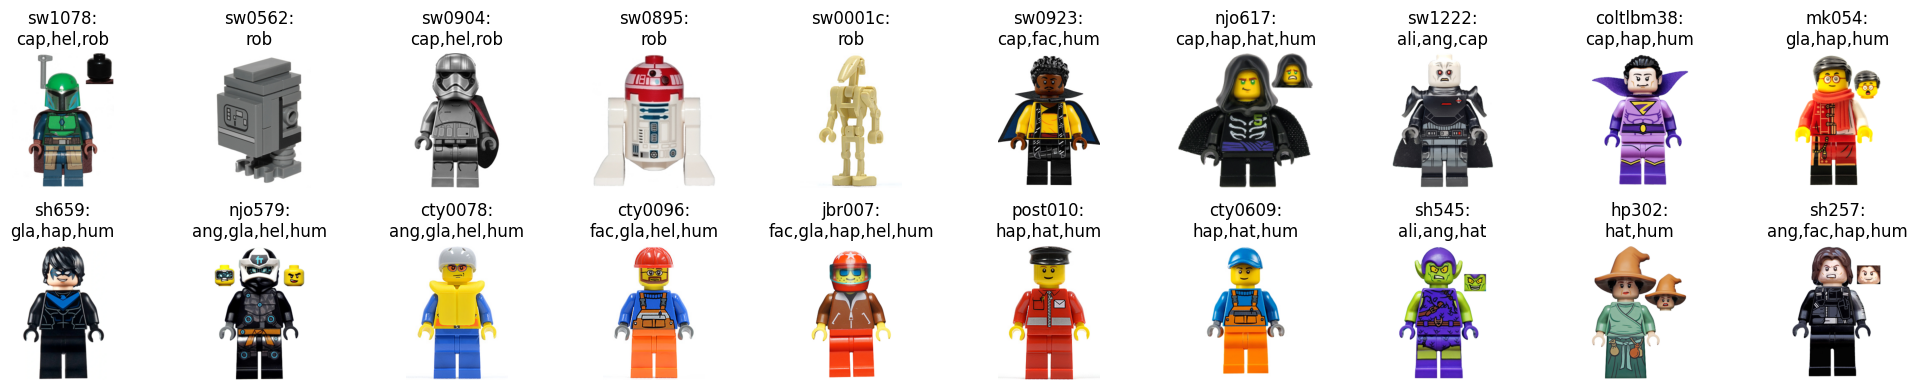

In [18]:
_, axs = plt.subplots(2, 10, figsize=(20, 4))
for i, k in enumerate(val_keys[:20]):
    ax = axs[i // 10, i % 10]
    ax.imshow(plt.imread(Path.cwd() / "data/data/minifigures" / f"{k}.png"))
    ax.set_title(f"{k}:\n{','.join([x[:3] for x in dataset[k]])}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [19]:
# Check if split is done correctly
assert len(dataset) == (len(train_keys) + len(val_keys) + len(test_keys))
assert set(train_keys) & set(val_keys) == set()
assert set(train_keys) & set(test_keys) == set()
assert set(test_keys) & set(val_keys) == set()

In [20]:
# Write away the splits
dataset_f = Path.cwd() / "data/data/datasets"
dataset_f.mkdir(exist_ok=True, parents=True)

with open(dataset_f / "train.json", "w") as f:
    json.dump({k: dataset[k] for k in train_keys}, f, indent=2)
with open(dataset_f / "val.json", "w") as f:
    json.dump({k: dataset[k] for k in val_keys}, f, indent=2)
with open(dataset_f / "test.json", "w") as f:
    json.dump({k: dataset[k] for k in test_keys}, f, indent=2)